# 🧠 EDA on Titanic Dataset

This notebook performs exploratory data analysis (EDA) on the uploaded Titanic dataset.

In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Upload CSV
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Summary statistics
print(df.info())
print(df.describe())
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

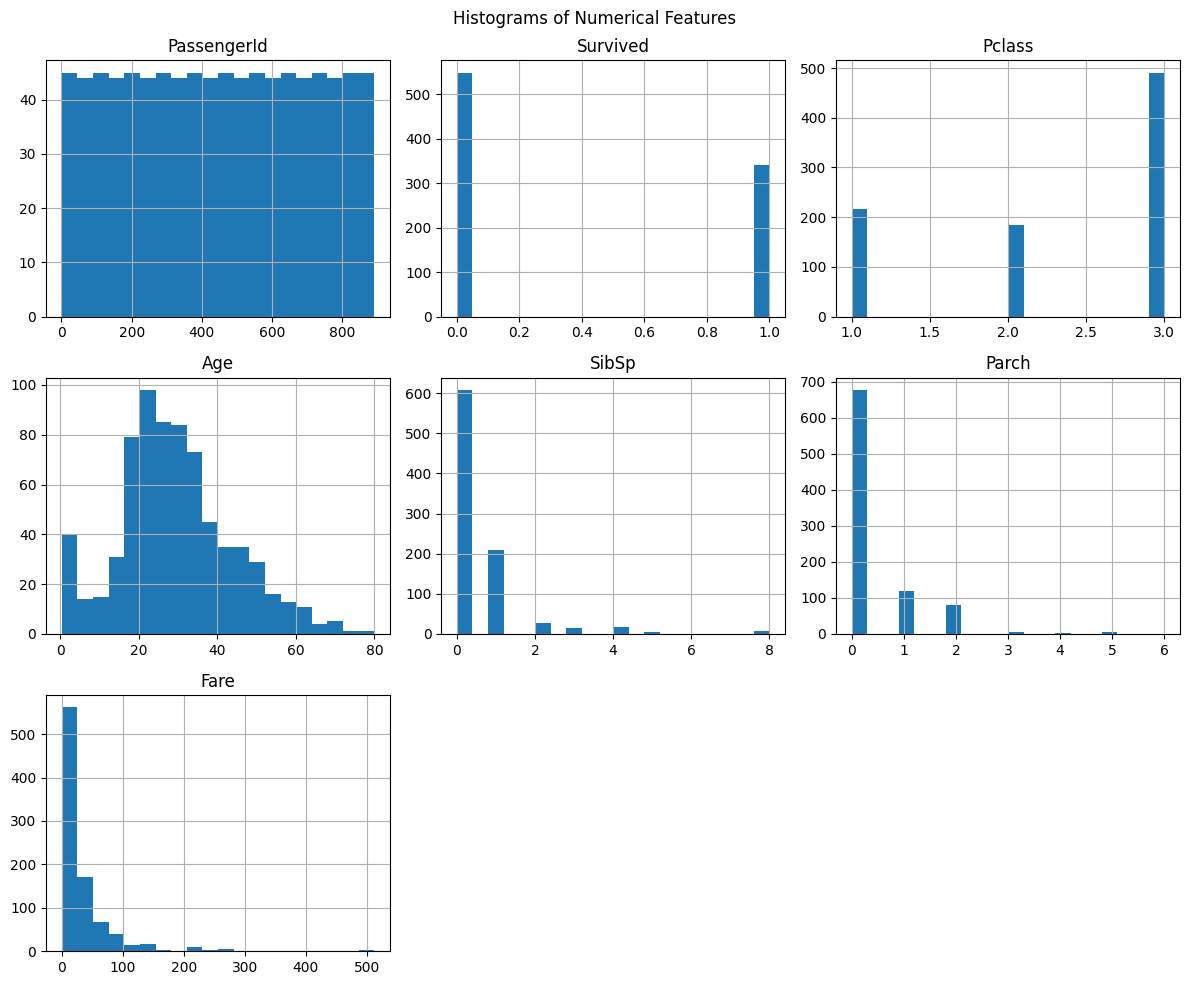

In [3]:
# Histograms of numeric features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

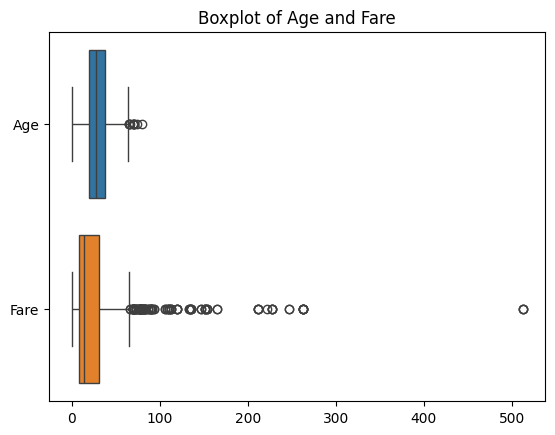

In [4]:
# Boxplots for Age and Fare
sns.boxplot(data=df[['Age', 'Fare']], orient='h')
plt.title("Boxplot of Age and Fare")
plt.show()

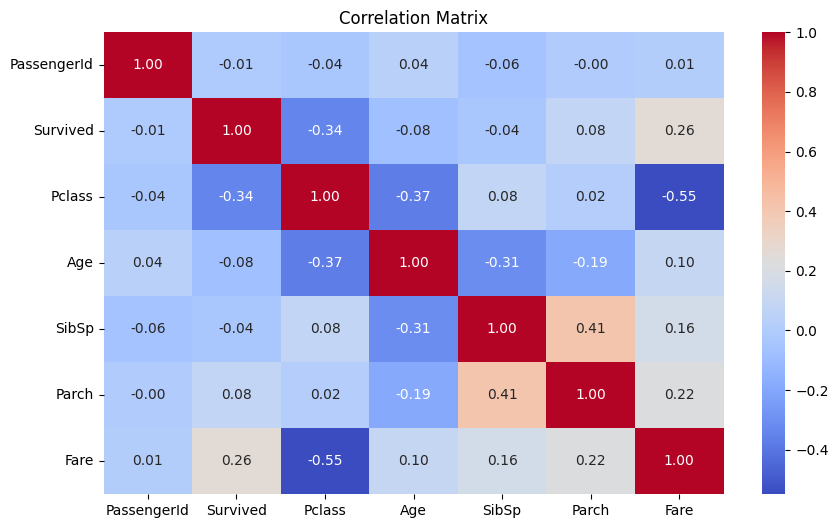

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

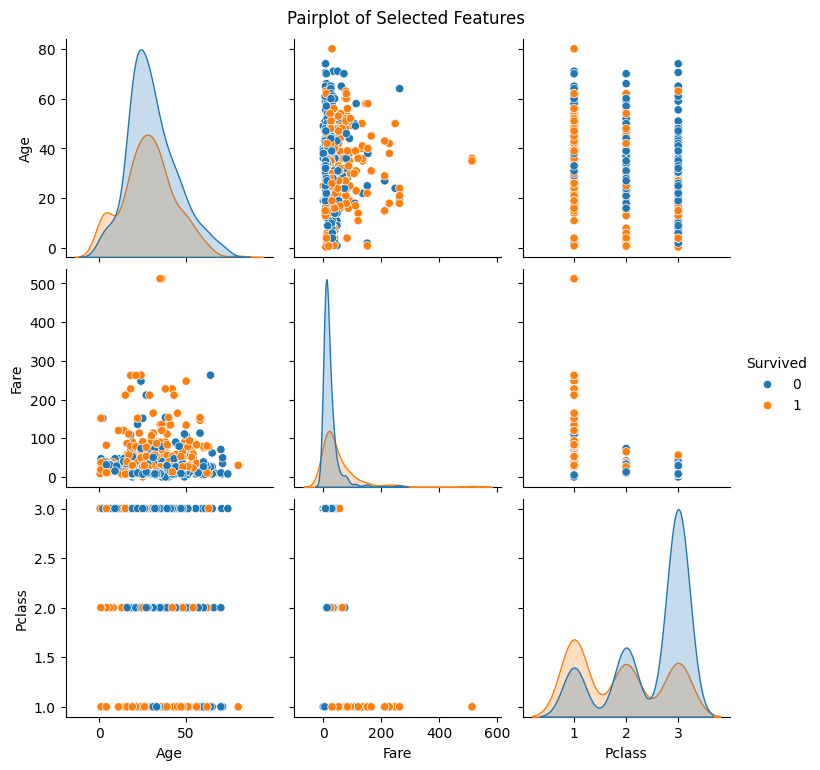

In [6]:
# Pairplot of select numerical features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

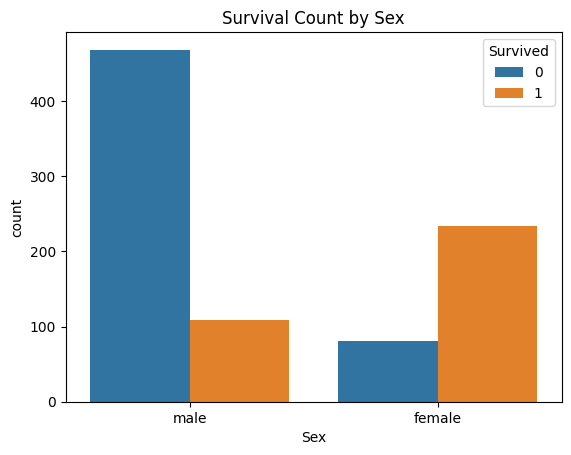

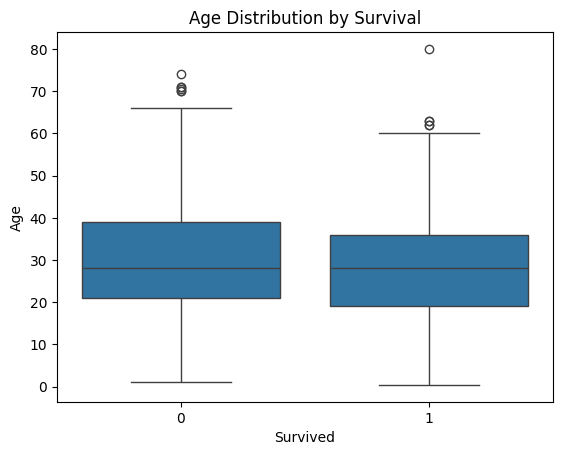

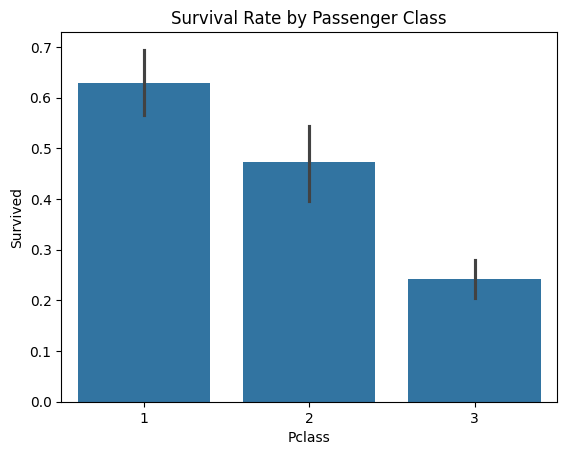

In [7]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()

# Age by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

# Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [8]:
# Interactive Plotly Histogram
fig = px.histogram(df, x="Age", color="Survived", nbins=30, title="Interactive Age Distribution by Survival")
fig.show()

# Interactive Scatter Plot
fig = px.scatter(df, x='Age', y='Fare', color='Survived', size='Pclass', hover_data=['Name'],
                 title='Age vs Fare (Survival)')
fig.show()